In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def imshowfunc(title = "" , image = None , size = 10) :
    h , w = image.shape[0] , image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [2]:
image = cv2.imread('landscape.jpeg')

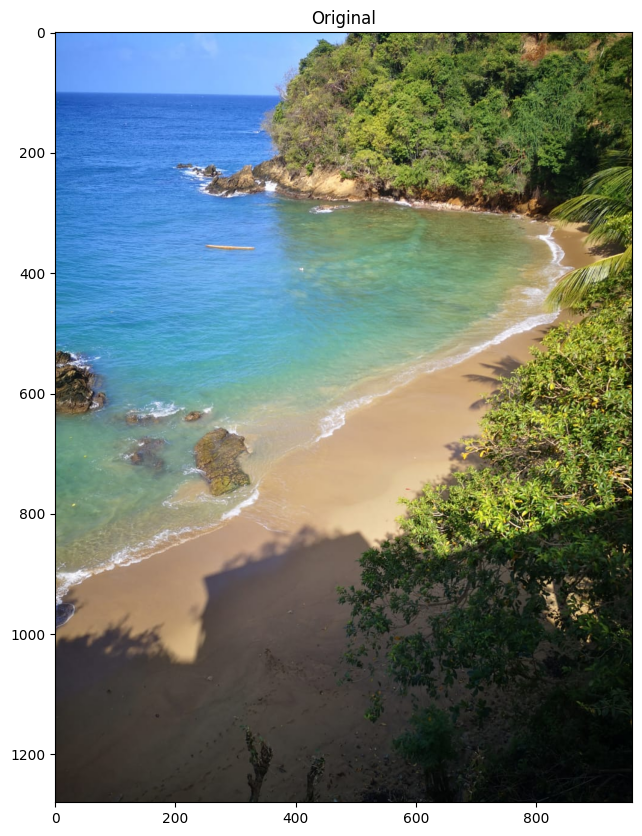

In [5]:
imshowfunc('Original',image)

In [8]:
height , width = image.shape[:2]

print(height , width)
image.shape

1280 960


(1280, 960, 3)

In [10]:
quarter_height , quarter_weight = height/4 , width/4

In [ ]:
#      | 1 0 Tx|
#  T = | 1 0 Tx|

#1 → حفظ اندازه و جهت

#0 → عدم چرخش و عدم برهم‌زدن محورها

T = np.float32([[1,0 , quarter_weight] , [0,1,quarter_height]])

In [12]:
T

array([[  1.,   0., 240.],
       [  0.,   1., 320.]], dtype=float32)

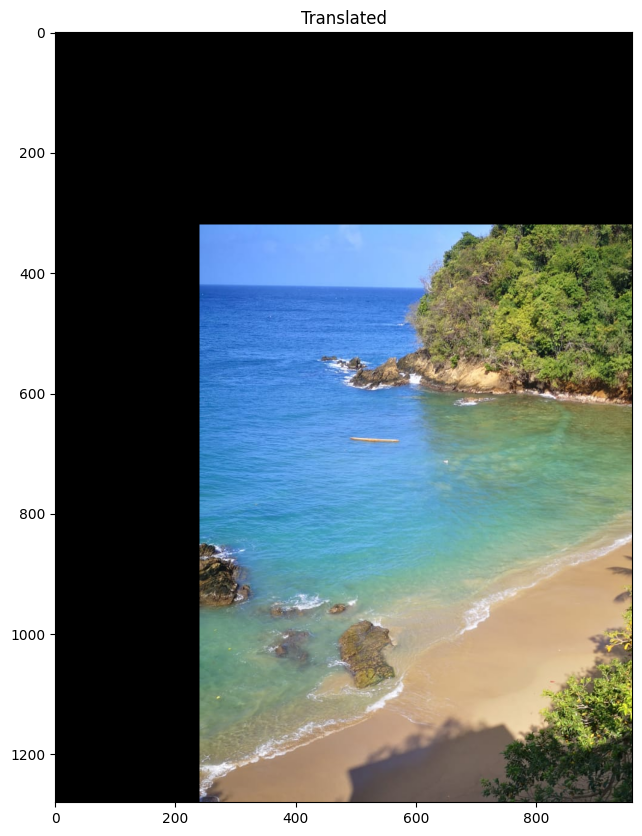

In [23]:
img_trans = cv2.warpAffine(image , T, (width,height))
imshowfunc('Translated' , img_trans)

In [ ]:
rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2) , 90, 1)
# the last parametr is for scale : Size

In [34]:
rotation_matrix

array([[ 6.123234e-17,  1.000000e+00, -1.600000e+02],
       [-1.000000e+00,  6.123234e-17,  1.120000e+03]])

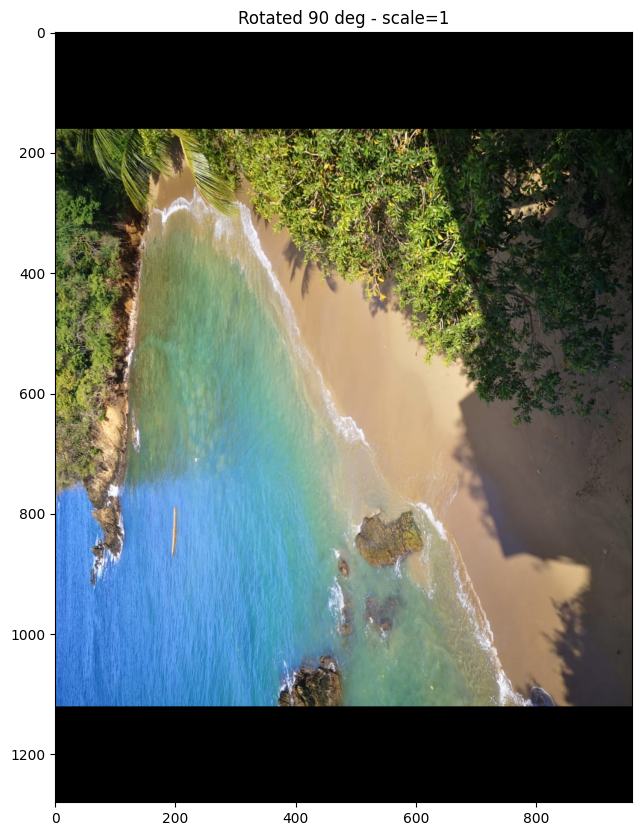

In [36]:
rotated_image = cv2.warpAffine(image , rotation_matrix, (width,height))
#width , height in Warpaffine is for the size of the frame
imshowfunc('Rotated 90 deg - scale=1' , rotated_image)

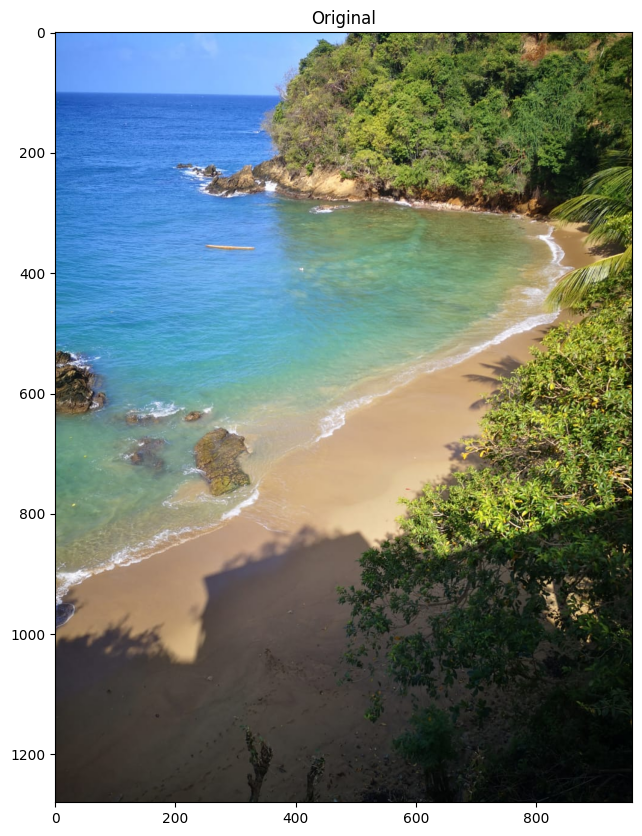

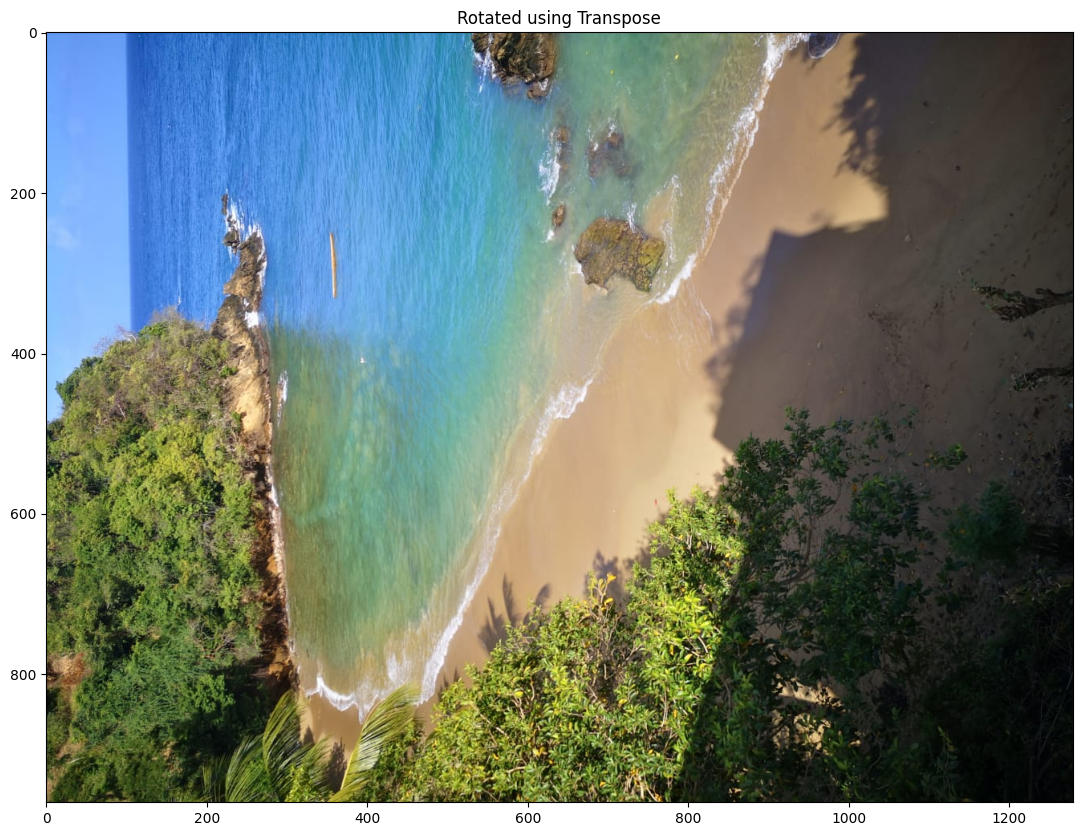

In [38]:
rotated_image = cv2.transpose(image)
imshowfunc ('Original' , image)
imshowfunc('Rotated using Transpose' , rotated_image)

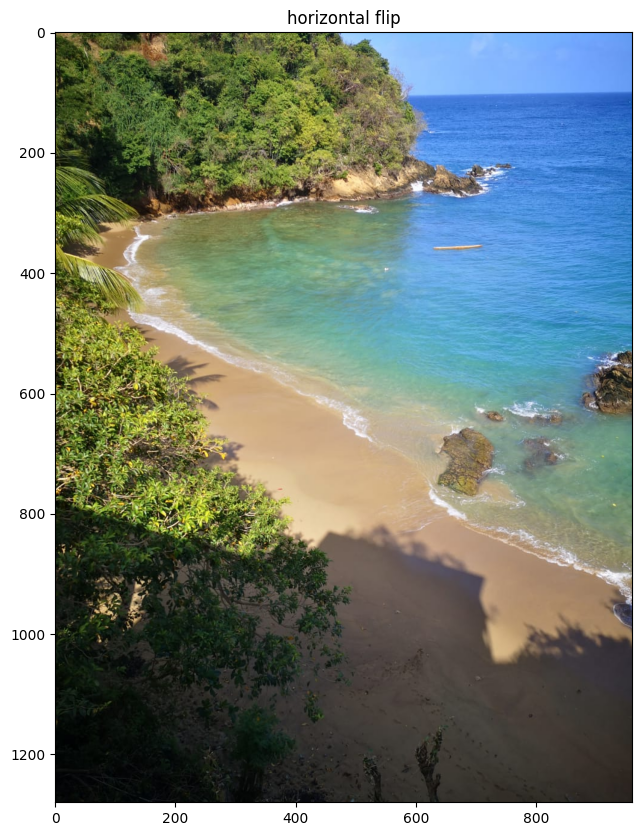

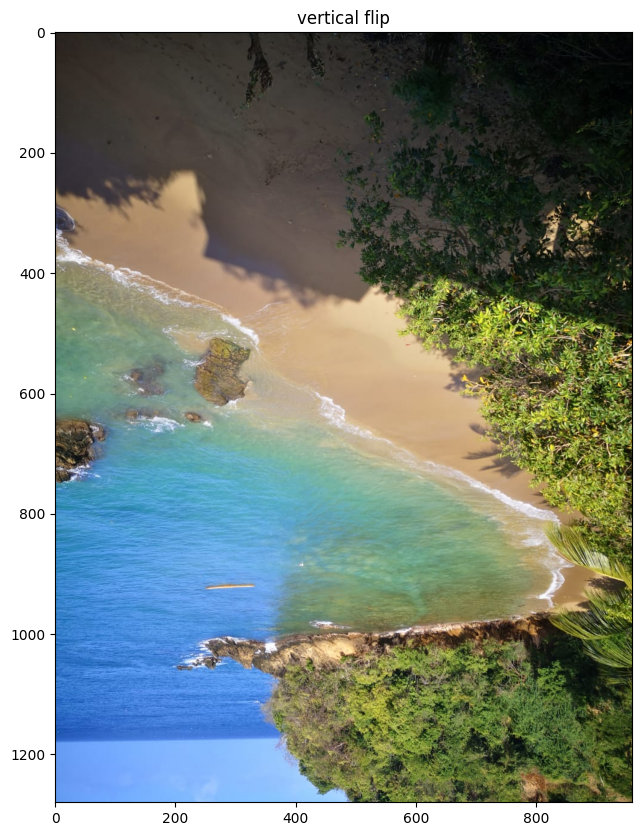

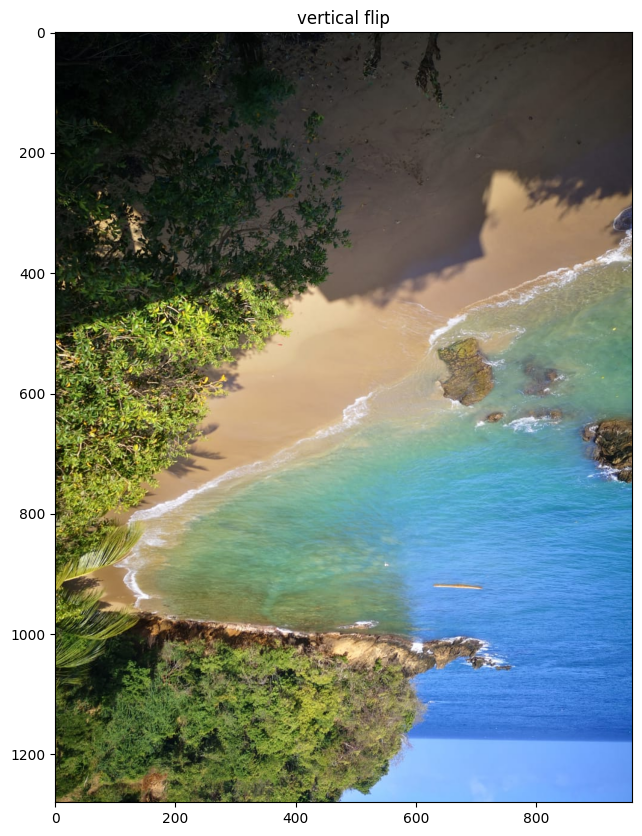

In [43]:
# mirrir the image
flipped = cv2.flip(image,1)
imshowfunc('horizontal flip' , flipped)

flipped = cv2.flip(image,0)

imshowfunc('vertical flip' , flipped)

flipped = cv2.flip(image,-1)

imshowfunc('vertical flip' , flipped)

# 0 → up/down : Vertical flip

# 1 → left/right : Horizontal flip

# -1 → both : Both directions